In [18]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import load_logs

pbounds = {"mid_i_mean": [97, 110], "ext_i_mean": [97, 110], "inj_i_mean": [116, 128]}
new_optimizer = BayesianOptimization(f=(lambda inj_i_mean, mid_i_mean, ext_i_mean:0),pbounds=pbounds)

# New optimizer is loaded with previously seen points
load_logs(new_optimizer, logs=["../Data/Simulations/logs.json"])

new_optimizer.space.target

In [25]:
def extract_target_logs(fn, logdir = "../Data/Simulations/"):
    pbounds = {"mid_i_mean": [97, 110], "ext_i_mean": [97, 110], "inj_i_mean": [116, 128]}
    new_optimizer = BayesianOptimization(f=(lambda inj_i_mean, mid_i_mean, ext_i_mean:0),pbounds=pbounds)
    # New optimizer is loaded with previously seen points
    load_logs(new_optimizer, logs=[logdir+fn])

    return new_optimizer.space.target
extract_target_logs("logs.json")

array([ 73.61018772,  82.81792205, 117.85141151, 127.7585105 ,
       129.95153431, 122.48121462, 135.00442889, 139.2024724 ,
       139.10593536, 103.31252866, 140.13928589, 140.76415407,
       135.70712309, 140.68378421, 140.9345352 , 115.79949849,
       139.10056539, 140.75309626, 113.14151144, 140.91696649,
       140.90184677, 140.43048586, 141.1182964 , 140.91220277,
       131.95435419])

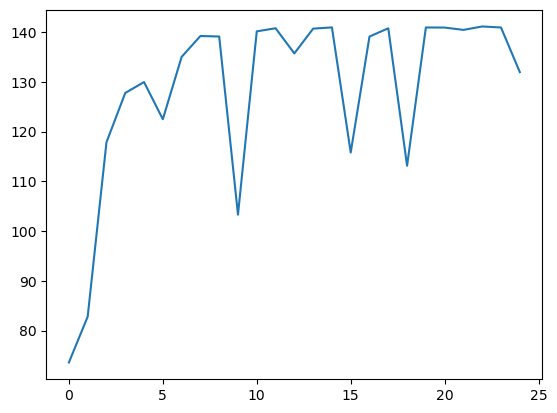

In [24]:
plt.plot(extract_target_logs("logs.json"))